In [1]:
#Kavya Bhojani
#runtime type - GPU
import numpy as np 
import pandas as pd  
import seaborn as sns
import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
#from keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
#from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Image Pre-processing 
traindir = "/content/drive/MyDrive/KavyaBhojani-Infowarehouse/Dataset-Plant disease/PlantDisease_smallDataset/PD-tv/train"
validdir = "/content/drive/MyDrive/KavyaBhojani-Infowarehouse/Dataset-Plant disease/PlantDisease_smallDataset/PD-tv/valid"
testdir = "/content/drive/MyDrive/KavyaBhojani-Infowarehouse/Dataset-Plant disease/PlantDisease_smallDataset/test/test"

# ImageDataGenerator - takes the inputs of the original data (train_datagen) and then transform it on a random basis, returning the 
#output resultant containing only the newly changed data(valid_datagen).

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128
print("Training :")
training_set = train_datagen.flow_from_directory(traindir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
print("Testing :")
valid_set = valid_datagen.flow_from_directory(validdir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')

Training :
Found 7975 images belonging to 20 classes.
Testing :
Found 1683 images belonging to 20 classes.


In [4]:
class_dict = training_set.class_indices
print(class_dict)

{'bacterial_spot': 0, 'black_measeles': 1, 'black_rot': 2, 'cercospora_spotgray': 3, 'early_blight': 4, 'haunglongbird_citrus_greening': 5, 'healthy': 6, 'isariopsis_leaf_spot': 7, 'late_blight': 8, 'leaf_blight': 9, 'leaf_mold': 10, 'leaf_scorch': 11, 'mosaic_virus': 12, 'powdery_mildew': 13, 'rust': 14, 'scab': 15, 'septorial_leaf_spot': 16, 'spider_mites': 17, 'target_spot': 18, 'yellow_leaf_curl_virus': 19}


In [5]:
li = list(class_dict.keys())
print(li)

['bacterial_spot', 'black_measeles', 'black_rot', 'cercospora_spotgray', 'early_blight', 'haunglongbird_citrus_greening', 'healthy', 'isariopsis_leaf_spot', 'late_blight', 'leaf_blight', 'leaf_mold', 'leaf_scorch', 'mosaic_virus', 'powdery_mildew', 'rust', 'scab', 'septorial_leaf_spot', 'spider_mites', 'target_spot', 'yellow_leaf_curl_virus']


In [6]:
train_num = training_set.samples
valid_num = valid_set.samples

MODEL PREPARATION

In [7]:
base_model=VGG16(include_top=False,input_shape=(224,224,3))
base_model.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [8]:
#using softmax activation function for the output layer
#the range will be between 0 to 1, and the sum of all the probabilities will be equal to one
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(20,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 20)                501780    
                                                                 
Total params: 15,216,468
Trainable params: 501,780
Non-trainable params: 14,714,688
_________________________________________________________________


In [9]:
#Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models
#Combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle 
#sparse gradients on noisy problems.
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
#fitting images to CNN
history = classifier.fit(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=15,
                         validation_steps=valid_num//batch_size,
                         )

Epoch 1/15
62/62 [==============================] - 2844s 46s/step - loss: 1.5187 - accuracy: 0.5598 - val_loss: 0.7157 - val_accuracy: 0.7716
Epoch 2/15
62/62 [==============================] - 116s 2s/step - loss: 0.7443 - accuracy: 0.7622 - val_loss: 0.4952 - val_accuracy: 0.8444
Epoch 3/15
62/62 [==============================] - 114s 2s/step - loss: 0.5882 - accuracy: 0.8145 - val_loss: 0.5010 - val_accuracy: 0.8233
Epoch 4/15
62/62 [==============================] - 116s 2s/step - loss: 0.5319 - accuracy: 0.8299 - val_loss: 0.4691 - val_accuracy: 0.8383
Epoch 5/15
62/62 [==============================] - 114s 2s/step - loss: 0.4293 - accuracy: 0.8668 - val_loss: 0.3806 - val_accuracy: 0.8750
Epoch 6/15
62/62 [==============================] - 116s 2s/step - loss: 0.3911 - accuracy: 0.8743 - val_loss: 0.3489 - val_accuracy: 0.8828
Epoch 7/15
62/62 [==============================] - 114s 2s/step - loss: 0.3695 - accuracy: 0.8798 - val_loss: 0.4045 - val_accuracy: 0.8630
Epoch 8/15


In [12]:
#Saving the model
filepath="VGG16model.h5"
classifier.save(filepath)

VISUALIZING THE ACCURACY

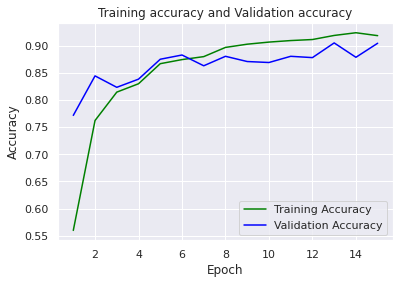

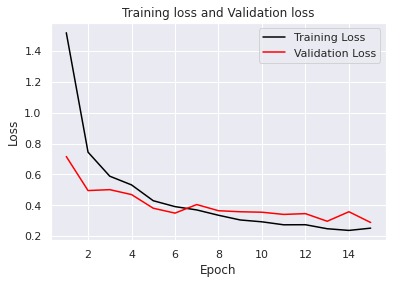

In [13]:
#using matplotlib and seaborn for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#plotting for accuracy
#epoch vs accuracy graph
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training accuracy and Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#plotting for loss
#training loss vs validation loss graph
plt.plot(epochs, loss, color='black', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training loss and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

PREDICTED DISEASE : 
1/1 [==============================] - 0s 16ms/step


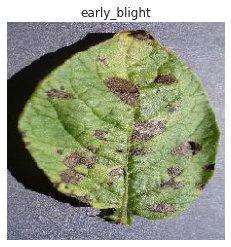

In [16]:
#PREDICTING AN IMAGE
#taking an image from the test directory to check whether our model is detecting the right disease
#from keras.preprocessing import image
import keras.utils as image
import numpy as np
#PotatoHealthy1.JPG
#CornCommonRust3.JPG
#PotatoEarlyBlight2.JPG
#AppleScab1.JPG
#TomatoYellowCurlVirus1.JPG
image_path = "/content/drive/MyDrive/KavyaBhojani-Infowarehouse/Dataset-Plant disease/PlantDisease_smallDataset/test/test/PotatoEarlyBlight2.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255



print("PREDICTED DISEASE : ")
prediction = classifier.predict(img)
#decoding the results into a list of tuples (class, description, probability)
#one list per each sample in the batch
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#plotting image with predicted class name i.e the name of the disease        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()